In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [190]:
df = pd.read_csv('telecom_churn_data.csv')

In [191]:
df.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [192]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

We can eliminate the following columns straight away:
- last_date_of_month_6
- last_date_of_month_7
- last_date_of_month_8
- last_date_of_month_9


In [193]:
df = df.drop(labels=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'],axis=1)

## Missing value treatment

#### Dorping the rows which are more than 40% empty and the columns which are more than 60% empty

In [194]:
df = df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1)

In [195]:
df = df.dropna(thresh=df.shape[1]*0.4,how='all',axis=0)

### Imputing the missing values

In [196]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98981 entries, 0 to 99998
Data columns (total 182 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mobile_number        98981 non-null  int64  
 1   circle_id            98981 non-null  int64  
 2   loc_og_t2o_mou       98981 non-null  float64
 3   std_og_t2o_mou       98981 non-null  float64
 4   loc_ic_t2o_mou       98981 non-null  float64
 5   arpu_6               98981 non-null  float64
 6   arpu_7               98981 non-null  float64
 7   arpu_8               98981 non-null  float64
 8   arpu_9               98981 non-null  float64
 9   onnet_mou_6          96062 non-null  float64
 10  onnet_mou_7          96140 non-null  float64
 11  onnet_mou_8          94621 non-null  float64
 12  onnet_mou_9          92254 non-null  float64
 13  offnet_mou_6         96062 non-null  float64
 14  offnet_mou_7         96140 non-null  float64
 15  offnet_mou_8         94621 non-null

In [197]:
# Scoping our sample and keeping only the High valued customers (top 30%) ie. who demonstrated high spending in the initial two months
# creating our target value indicator "churn", based on business logics 
df['total_rech_amt_good_phase'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2
total_recharge_amount_good_phase_cutoff = df['total_rech_amt_good_phase'].quantile(0.7)
df = df[df['total_rech_amt_good_phase'] > total_recharge_amount_good_phase_cutoff]

# dropping the derrived column "total_rech_amt_good_phase"
df = df.drop(['total_rech_amt_good_phase'],axis=1)

In [198]:
# derriving a variable for total overall usage in 9th month
df['total_overall_usage'] = df['total_og_mou_9'] + df['total_ic_mou_9'] + df['vol_2g_mb_9'] + df['vol_3g_mb_9']
df['churn'] = np.where(df['total_overall_usage']== 0, 1, 0)
df['churn'].value_counts()

# dropping the arbitary/derrived column "total_overall_usage"
df = df.drop(['total_overall_usage'],axis=1)

In [199]:
 df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29694 entries, 7 to 99988
Data columns (total 183 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mobile_number        29694 non-null  int64  
 1   circle_id            29694 non-null  int64  
 2   loc_og_t2o_mou       29694 non-null  float64
 3   std_og_t2o_mou       29694 non-null  float64
 4   loc_ic_t2o_mou       29694 non-null  float64
 5   arpu_6               29694 non-null  float64
 6   arpu_7               29694 non-null  float64
 7   arpu_8               29694 non-null  float64
 8   arpu_9               29694 non-null  float64
 9   onnet_mou_6          29493 non-null  float64
 10  onnet_mou_7          29506 non-null  float64
 11  onnet_mou_8          28873 non-null  float64
 12  onnet_mou_9          28113 non-null  float64
 13  offnet_mou_6         29493 non-null  float64
 14  offnet_mou_7         29506 non-null  float64
 15  offnet_mou_8         28873 non-null

In [200]:
# As per the analysis scope dropping all the variables of the 9th month, 
# since we have already derrived a chrun variable for the end prediction analysis
ninth_month_columns = [col for col in df.columns if ('_9' in col or 'sep_' in col)]
df = df.drop(ninth_month_columns, axis=1)

In [201]:
df.shape

(29694, 139)

In [202]:
# derriving the rate of churn 
rate_of_churn = round((len(df[df.churn == 1]) / len(df)) * 100, ndigits=2)
rate_of_churn 

8.51

ie. 8.51% customers churn in the 9th month (as per the trends)

In [203]:
# Finding all columns that have unique values, ie. have exactly zero variance
zero_variance_columns = []
for col in df.columns:
    if len(df[col].value_counts()) == 1:
        zero_variance_columns.append(col)
# Dropping all columns that have unique values, ie. have exactly zero variance
df = df.drop(zero_variance_columns,axis=1)

In [204]:
df.shape

(29694, 129)

In [205]:
def null_value_stats():
    print("No. of columns containing null values")
    print(len(df.columns[df.isna().any()]))

    print("No. of columns not containing null values")
    print(len(df.columns[df.notna().all()]))

    print("Total no. of columns in the dataframe")
    print(len(df.columns))

    # getting the columns that still have null values
    nan_cols = [i for i in df.columns if df[i].isnull().any()]
    return nan_cols

    
null_value_stats()

No. of columns containing null values
84
No. of columns not containing null values
45
Total no. of columns in the dataframe
129


['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

### Missing value imputation 

In [206]:
fields_to_be_imputed = ['date_of_last_rech']

for field in fields_to_be_imputed:
    for month in ['6', '7', '8']:
        fields_to_be_imputed = field + '_' + month
        df[fields_to_be_imputed].fillna(df[fields_to_be_imputed].mode()[0], inplace=True)


null_value_stats()

No. of columns containing null values
81
No. of columns not containing null values
48
Total no. of columns in the dataframe
129


['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

In [207]:
# instead of date of last recharge, we should consider day of recharge
df['date_of_last_rech_6'] = pd.to_datetime(df.date_of_last_rech_6).dt.day
df['date_of_last_rech_7'] = pd.to_datetime(df.date_of_last_rech_7).dt.day
df['date_of_last_rech_8'] = pd.to_datetime(df.date_of_last_rech_8).dt.day

### Imputing missing observations with Median column value

In [208]:
missing_cols = df.columns[df.isnull().sum()>0]
for col in missing_cols:
    df[col].fillna((df[col].median()), inplace=True)

null_value_stats()
df.shape

No. of columns containing null values
0
No. of columns not containing null values
129
Total no. of columns in the dataframe
129


(29694, 129)

#### Hence all the missing values have been taken care of, therefore we can move towards data analysis

# EDA

## Searching and treating outliers

In [209]:
df.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,2.969400e+04,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,...,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000
mean,7.001223e+09,588.984226,591.610585,537.473124,299.228691,307.475407,272.576190,422.957406,428.895909,384.855237,...,0.182798,0.171853,0.138378,0.150030,0.140803,1266.020846,129.655153,135.054904,121.279641,0.085101
std,6.845975e+05,443.251063,464.048634,493.599673,462.034359,483.041870,466.906501,470.709239,486.811567,475.211017,...,0.619070,0.582356,0.873010,0.952455,0.974437,975.802543,391.362611,407.968583,389.937424,0.279037
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
1%,7.000028e+09,19.235800,32.731100,0.000000,0.000000,0.000000,0.000000,1.048600,1.058600,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,0.000000
10%,7.000269e+09,272.070300,276.389400,137.353600,12.146000,11.666000,6.866000,58.583000,59.580000,35.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,294.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000642e+09,365.491750,367.184750,292.576250,43.410000,43.280000,33.960000,142.850000,141.282500,111.780000,...,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001233e+09,497.510000,495.966000,454.528000,129.040000,128.640000,106.810000,287.110000,287.085000,253.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,918.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001815e+09,705.839000,703.139750,673.782000,356.532500,363.605000,300.807500,527.037500,536.505000,486.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1931.000000,1.572500,1.950000,0.000000,0.000000
90%,7.002167e+09,995.698000,998.027600,988.560600,798.959000,829.160000,728.916000,920.566000,938.515000,858.431000,...,1.000000,1.000000,0.000000,0.000000,0.000000,2847.000000,440.003000,454.604000,394.291000,0.000000


In [210]:
cont_cols = [col for col in df.columns if col not in ['churn','mobile_number']]

for col in cont_cols:
    percentiles = df[col].quantile([0.01,0.99]).values
    df[col][df[col] <= percentiles[0]] = percentiles[0]
    df[col][df[col] >= percentiles[1]] = percentiles[1]
    
df.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,2.969400e+04,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,...,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000,29694.000000
mean,7.001223e+09,579.531124,582.079842,526.938896,290.533189,298.156335,263.243111,415.174645,420.322056,374.928745,...,0.170674,0.162322,0.100795,0.103624,0.094396,1265.316360,120.588075,125.980660,112.053045,0.085101
std,6.845975e+05,336.062761,338.160992,371.087700,406.178566,420.985562,400.093864,421.809085,431.077348,402.941138,...,0.517079,0.503970,0.428631,0.443643,0.431882,973.742018,318.921932,337.096425,312.711926,0.279037
min,7.000000e+09,19.235800,32.731100,0.000000,0.000000,0.000000,0.000000,1.048600,1.058600,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,0.000000
1%,7.000028e+09,19.239706,32.748677,0.000000,0.000000,0.000000,0.000000,1.049902,1.059902,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,0.000000
10%,7.000269e+09,272.070300,276.389400,137.353600,12.146000,11.666000,6.866000,58.583000,59.580000,35.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,294.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000642e+09,365.491750,367.184750,292.576250,43.410000,43.280000,33.960000,142.850000,141.282500,111.780000,...,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001233e+09,497.510000,495.966000,454.528000,129.040000,128.640000,106.810000,287.110000,287.085000,253.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,918.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001815e+09,705.839000,703.139750,673.782000,356.532500,363.605000,300.807500,527.037500,536.505000,486.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1931.000000,1.572500,1.950000,0.000000,0.000000
90%,7.002167e+09,995.698000,998.027600,988.560600,798.959000,829.160000,728.916000,920.566000,938.515000,858.431000,...,1.000000,1.000000,0.000000,0.000000,0.000000,2847.000000,440.003000,454.604000,394.291000,0.000000


Creating derived colums
- Average values of 3 months for each attributes were created to check if that value could address all the months.
- Median value of Internet usage (2G + 3G) across months was created to capture the churn rate as it was observed majority of the churn happens when the internet usage pattern shows a decline
- The AON variable was used to create tenure buckets. It was observed larger the tenure, lesser was the churn - as customers who are newly acquired to the network churned more as compared to the old customers.

In [211]:
df['int_usage_median'] = df[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].median(axis=1)
df['int_usage_median'] = df.int_usage_median.map(lambda x: 1 if x == 0 else 0)
df = df.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'], 1)


df['tenure_buck'] = np.round(df['aon']/365,1)
bins = [0, 1, 2, 3, 4, 10]
df['tenure_buck'] = pd.cut(df['tenure_buck'], bins)
df['tenure_buck'].value_counts()

(4, 10]    9614
(1, 2]     7394
(0, 1]     5264
(2, 3]     4484
(3, 4]     2938
Name: tenure_buck, dtype: int64

## Correlation Analysis

In [212]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

df = df.drop(to_drop, axis=1)
df.tenure_buck.dtype

CategoricalDtype(categories=[(0, 1], (1, 2], (2, 3], (3, 4], (4, 10]],
              ordered=True)

In [213]:
#create dummy for tenure_buck 
df = pd.get_dummies(df, drop_first=True)

df.rename(columns={"tenure_buck_(1, 2]": "tenure_buck_1_to_2","tenure_buck_(2, 3]":"tenure_buck_2_to_3",
                   "tenure_buck_(3, 4]":"tenure_buck_3_to_4",
                   "tenure_buck_(4, 10]":"tenure_buck_4_to_10"}, inplace=True)

In [214]:
df.shape

(29694, 73)

In [215]:
# After outlier treatment droping column which don't have much variance or zero variance
df = df.drop(['og_others_7','og_others_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','aon'], 1)

In [216]:
df.shape

(29694, 67)

### Visualizating the data for patterns

[Text(0, 0.5, '(%)')]

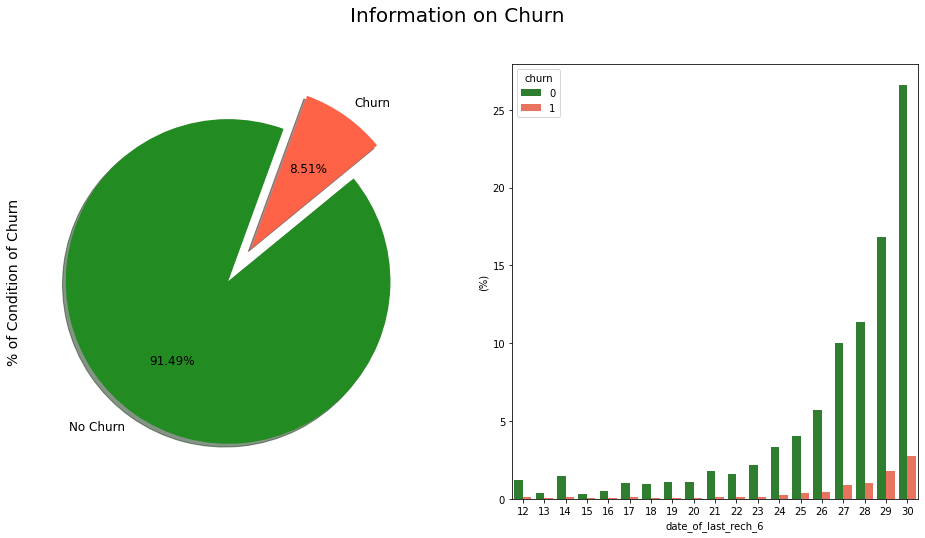

In [217]:
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#228B22", "#FF6347"]

labels ="No Churn", "Churn"
plt.suptitle('Information on Churn', fontsize=20)

df["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)
ax[0].set_ylabel('% of Condition of Churn', fontsize=14)

palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")

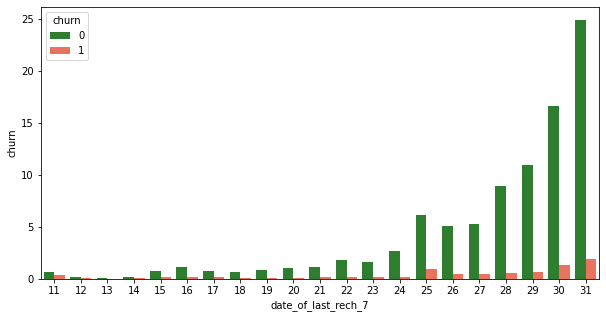

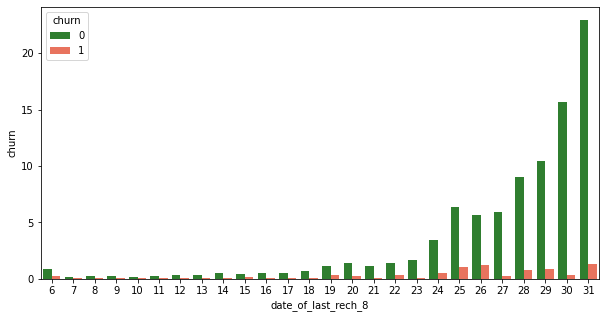

In [219]:
plt.figure(figsize=(10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_7", y="churn", hue="churn", data=df, palette=palette, 
            estimator=lambda x: len(x) / len(df) * 100)

plt.figure(figsize=(10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=df, palette=palette, 
            estimator=lambda x: len(x) / len(df) * 100)

In [220]:
telecom_df = df
telecom_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,churn,int_usage_median,tenure_buck_1_to_2,tenure_buck_2_to_3,tenure_buck_3_to_4,tenure_buck_4_to_10
7,7000701601,1069.180,1349.8500,1989.59541,57.84,453.43,567.1600,16.23,33.49,31.64,...,0,0,0,57.74,1,1,0,1,0,0
8,7001524846,378.721,492.2230,137.36200,413.69,94.66,80.6300,0.00,0.00,0.00,...,0,0,0,21.03,0,0,0,0,0,0
13,7002191713,492.846,205.6710,593.26000,501.76,413.31,119.2800,23.53,144.24,72.11,...,0,0,0,0.00,0,1,0,0,0,1
16,7000875565,430.975,299.8690,187.89400,50.51,296.29,229.7400,0.00,2.83,0.00,...,0,0,0,0.00,0,1,1,0,0,0
17,7000187447,690.008,32.7311,25.49900,1185.91,61.64,1.0586,0.00,4.76,4.81,...,0,0,0,0.00,0,1,1,0,0,0


# Modeling

### Splitting Data into Training and Test Sets

In [222]:
# Putting feature variable to X
X = telecom_df.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = telecom_df.churn

# defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# normalizing all columns 
X_norm = X.apply(normalize) 
X_norm.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,loc_og_t2t_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,int_usage_median,tenure_buck_1_to_2,tenure_buck_2_to_3,tenure_buck_3_to_4,tenure_buck_4_to_10
7,0.534073,0.669567,1.000000,0.026609,0.193806,0.234027,0.046339,0.113740,0.109152,0.047675,...,0.0,0.0,0.0,0.0,0.031680,1.0,0.0,1.0,0.0,0.0
8,0.182859,0.233586,0.069040,0.190316,0.040104,0.032895,0.000000,0.000000,0.000000,0.275648,...,0.0,0.0,0.0,0.0,0.011539,0.0,0.0,0.0,0.0,0.0
13,0.240910,0.087915,0.298181,0.230832,0.176618,0.048873,0.067182,0.489874,0.248766,0.046042,...,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,1.0
16,0.209438,0.135802,0.094438,0.023237,0.126485,0.094537,0.000000,0.009611,0.000000,0.039529,...,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.0
17,0.341200,0.000000,0.012816,0.545571,0.025958,0.000000,0.000000,0.016166,0.016594,0.036171,...,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.0


In [224]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.7,test_size=0.3,random_state=100)

print(f"Number transactions X_train dataset: {X_train.shape}")
print(f"Number transactions y_train dataset: {y_train.shape}")
print(f"Number transactions X_test dataset: {X_test.shape}")
print(f"Number transactions y_test dataset: {y_test.shape}")

Number transactions X_train dataset: (20785, 65)
Number transactions y_train dataset: (20785,)
Number transactions X_test dataset: (8909, 65)
Number transactions y_test dataset: (8909,)


### PCA